<a href="https://colab.research.google.com/github/gonzelagus/Agustin_Elias_Gonzalez-AnalisisChurn-Clientes.ipynb/blob/main/ProyectoDSParteI_Gonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto – 1° Entrega
## Ciencia de Datos  
### Alumno: Agustín Elías González

# 1. Abstract

Este trabajo se basa en un conjunto de datos que contiene información de 10.000 clientes de un banco. Incluye datos personales, financieros y de comportamiento, como edad, país, género, tiempo que llevan siendo clientes, productos contratados y saldo de sus cuentas. La columna más importante para este trabajo es **"SeFue"**, que indica si el cliente dejó o no la entidad.

Elegí este tema porque, como Técnico en Marketing recién recibido, me interesa entender qué factores hacen que un cliente se quede o se vaya de una empresa. Aunque los datos son de un banco, este tipo de estudio se puede aplicar a muchos otros rubros. Saber identificar qué características influyen en la fidelidad de un cliente puede ayudar a tomar mejores decisiones y a diseñar estrategias para que los clientes no abandonen un producto o servicio.

El objetivo principal es encontrar patrones que permitan anticipar si un cliente se va a ir. Para eso, voy a prestar atención a aspectos como:
- Datos demográficos: edad, género y país.
- Datos financieros: saldo y cantidad de productos contratados.
- Factores de relación: tiempo como cliente y si es activo o no.

En esta primera parte del proyecto voy a revisar la información, buscar valores faltantes, generar gráficos y calcular estadísticas básicas. Luego voy a interpretar qué significan esos resultados en relación con las preguntas que me propuse al inicio.

Más allá del objetivo académico, este trabajo también es una oportunidad para aprender a usar herramientas que me ayuden en futuros proyectos laborales, especialmente para tomar decisiones basadas en información real y no solo en suposiciones.

# 2. Preguntas e Hipótesis

## 2.1 Preguntas
1. ¿Los clientes con más tiempo en el banco tienen menos probabilidad de irse?
2. ¿Influye el saldo de la cuenta en la decisión de abandonar el banco?
3. ¿Existen diferencias en la tasa de abandono según el género?
4. ¿Los clientes que tienen más productos contratados tienden a quedarse más tiempo?
5. ¿La actividad reciente del cliente (estar activo o no) está relacionada con que permanezca o se vaya?

## 2.2 Hipótesis
1. A mayor antigüedad como cliente, menor es la probabilidad de que abandone el banco.
2. Los clientes con saldos más altos son menos propensos a irse.
3. No hay una diferencia significativa en la tasa de abandono entre hombres y mujeres.
4. Tener más de un producto contratado reduce la probabilidad de abandono.
5. Los clientes activos tienen más probabilidades de permanecer que los inactivos.

# 3. Análisis de Datos y Visualización

## 3.1 Carga de datos y revisión inicial
En esta sección se cargará el archivo con la información de clientes y se realizará una primera exploración para conocer la estructura, el tipo de variables y verificar si existen valores faltantes.

In [46]:
#  Importo librerías que usaré
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuro el estilo para los gráficos
sns.set(style="whitegrid", palette="pastel")

# URL pública del dataset en GitHub
url = "https://raw.githubusercontent.com/gonzelagus/Agustin_Elias_Gonzalez-AnalisisChurn-Clientes.ipynb/refs/heads/main/Churn_Modelling.csv"

# Cargo el dataset en un DataFrame de pandas
df = pd.read_csv(url)

# Pido mostrar las primeras filas para dar una mirada
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


## 3.2 Información general del dataset
Verifico el tipo de cada variable (texto, numérica) y cuántos valores no nulos hay por columna.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


### 3.3 Detección de valores faltantes
Identifico cuántos datos faltan por cada columna, para evaluar si conviene eliminar filas o no.

In [48]:
valores_faltantes = df.isnull().sum()
valores_faltantes

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0


## 3.4 Renombrar columnas a español
Creo un diccionario con los nombres originales como clave y sus equivalentes en español como valor.

In [49]:
# Armo un diccionario
nombres_columnas = {
    "RowNumber": "NumeroFila",
    "CustomerId": "IdCliente",
    "Surname": "Apellido",
    "CreditScore": "PuntajeCredito",
    "Geography": "Pais",
    "Gender": "Genero",
    "Age": "Edad",
    "Tenure": "Antiguedad",
    "Balance": "Balance",
    "NumOfProducts": "Productos",
    "HasCrCard": "TieneTarjetaCredito",
    "IsActiveMember": "ClienteActivo",
    "EstimatedSalary": "SalarioEstimado",
    "Exited": "SeFue"
}

# Renombro columnas
df.rename(columns=nombres_columnas, inplace=True)

# Muestro las primeras filas para verificar si se cambiaron
df.head()

,NumeroFila,IdCliente,Apellido,PuntajeCredito,Pais,Genero,Edad,Antiguedad,Balance,Productos,TieneTarjetaCredito,ClienteActivo,SalarioEstimado,SeFue
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


### 3.5 Manejo de valores faltantes
Como son muy pocos valores faltantes, los elimino para mantener la calidad de los datos.

In [51]:
# Elimino filas con datos faltantes
df = df.dropna()

# Confirmo que no haya más valores nulos
df.isnull().sum()

,0
NumeroFila,0
IdCliente,0
Apellido,0
PuntajeCredito,0
Pais,0
Genero,0
Edad,0
Antiguedad,0
Balance,0
Productos,0


# 4. Estadísticas


Con este paso busco conocer mejor el comportamiento de las variables numéricas. Calculare medidas como la media, mediana, desvío estándar, mínimo y máximo

In [52]:
# Calculo manualmente

resumen = pd.DataFrame({
    "Media": df.mean(numeric_only=True),
    "Mediana": df.median(numeric_only=True),
    "Desvío estándar": df.std(numeric_only=True),
    "Mínimo": df.min(numeric_only=True),
    "Máximo": df.max(numeric_only=True)
})

resumen

,Media,Mediana,Desvío estándar,Mínimo,Máximo
NumeroFila,5.003497e+03,5003.50,2886.321275,1.00,10000.00
IdCliente,1.569094e+07,15690732.00,71923.987928,15565701.00,15815690.00
PuntajeCredito,6.505296e+02,652.00,96.633003,350.00,850.00
Edad,3.892029e+01,37.00,10.487986,18.00,92.00
Antiguedad,5.013003e+00,5.00,2.892152,0.00,10.00
Balance,7.648149e+04,97173.29,62393.187035,0.00,250898.09
Productos,1.530206e+00,1.00,0.581669,1.00,4.00
TieneTarjetaCredito,7.055411e-01,1.00,0.455822,0.00,1.00
ClienteActivo,5.148030e-01,1.00,0.499806,0.00,1.00
SalarioEstimado,1.000998e+05,100218.21,57510.939962,11.58,199992.48


Las variables numéricas muestran un rango variado de edades (18 a 92 años), puntajes de crédito promedio de 650, y balances que llegan hasta casi 250.000.  

## 4.1 Gráficos exploratorios

## 4.1.1 Respecto a la edad


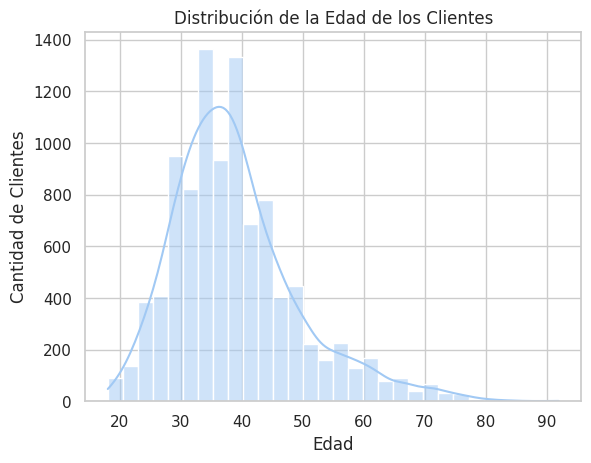

In [53]:
# Histograma de edad

sns.histplot(df["Edad"], bins=30, kde=True)
plt.title("Distribución de la Edad de los Clientes")
plt.xlabel("Edad")
plt.ylabel("Cantidad de Clientes")
plt.show()

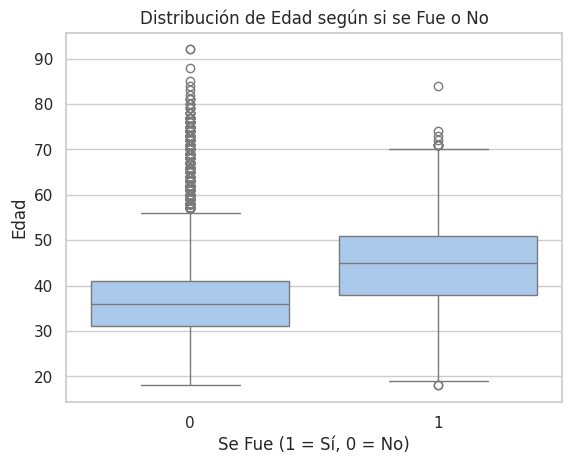

In [54]:
# Diagrama de caja Edad vs SeFue

sns.boxplot(data=df, x="SeFue", y="Edad")
plt.title("Distribución de Edad según si se Fue o No")
plt.xlabel("Se Fue (1 = Sí, 0 = No)")
plt.ylabel("Edad")
plt.show()

In [39]:
# Estadísticas de Edad según si el cliente se fue o no

df.groupby("SeFue")["Edad"].describe()

,count,mean,std,min,25%,50%,75%,max
SeFue,,,,,,,,
0,7960.0,37.405531,10.125696,18.0,31.0,36.0,41.0,92.0
1,2038.0,44.836605,9.759368,18.0,38.0,45.0,51.0,84.0


Se observa que la edad promedio de los clientes que se fueron es mayor a la de los que permanecieron. Esto refuerza la hipótesis de que los clientes de mayor edad tienden a abandonar más que los más jóvenes.

## 4.1.2 Respecto al país


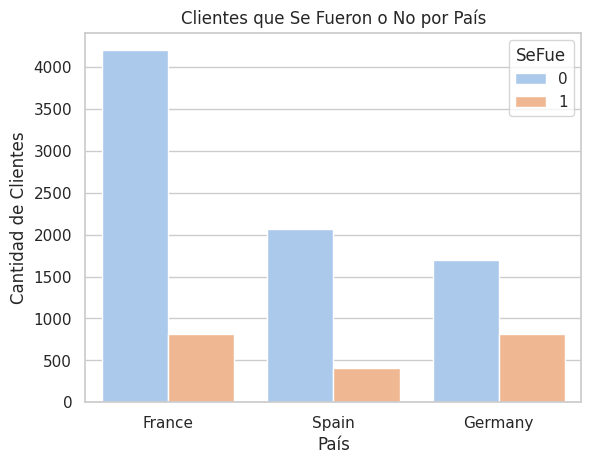

In [55]:
# Barras comparativas: País vs SeFue

sns.countplot(data=df, x="Pais", hue="SeFue")
plt.title("Clientes que Se Fueron o No por País")
plt.xlabel("País")
plt.ylabel("Cantidad de Clientes")
plt.show()

In [56]:
# Proporción de clientes que se fueron por país
prop_sefue = df.groupby("Pais")["SeFue"].mean().reset_index()
prop_sefue

,Pais,SeFue
0,France,0.161612
1,Germany,0.324701
2,Spain,0.166801


Se muestra que la proporción de abandono varía según el país. Por ejemplo, en Alemania el porcentaje de clientes que se fueron es más alto que en Francia o España, lo que indica que el mercado de origen influye en el churn.

## 4.1.3 Gráfico multivariado

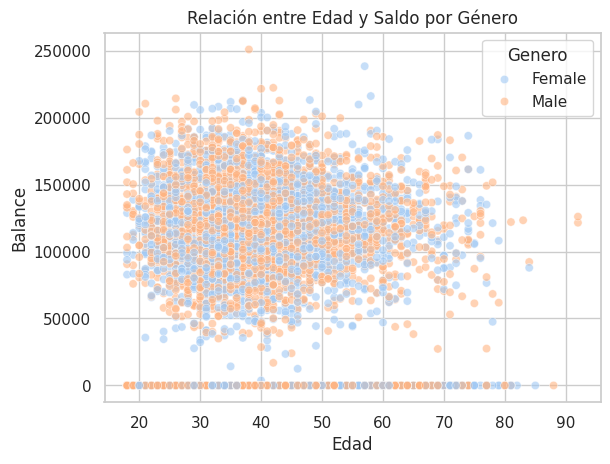

In [57]:
# Dispersión: Edad vs Balance, por Género
sns.scatterplot(data=df, x="Edad", y="Balance", hue="Genero", alpha=0.6)
plt.title("Relación entre Edad y Saldo por Género")
plt.xlabel("Edad")
plt.ylabel("Balance")
plt.show()

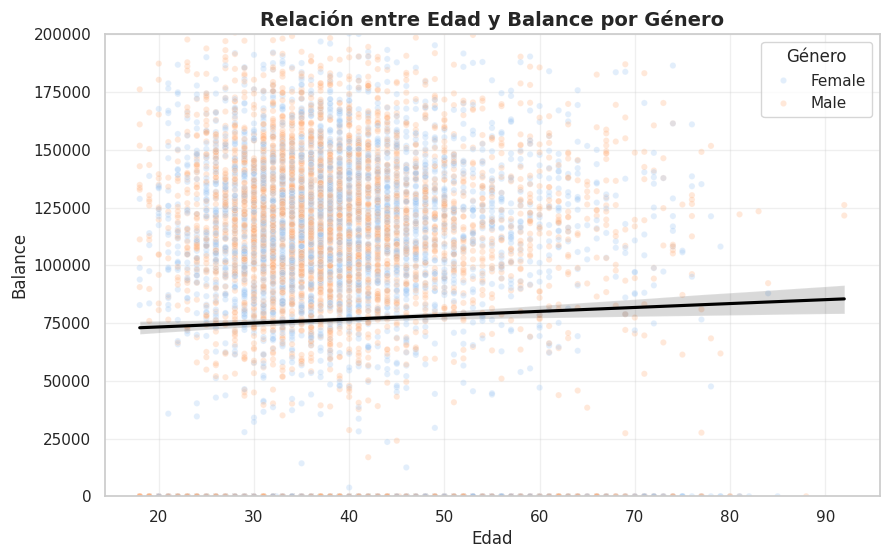

In [58]:
# Gráfico más claro y mejorado

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, x="Edad", y="Balance", hue="Genero",
    alpha=0.3, s=20
)

# Línea de tendencia general

sns.regplot(data=df, x="Edad", y="Balance", scatter=False, color="black")

plt.title("Relación entre Edad y Balance por Género", fontsize=14, weight="bold")
plt.xlabel("Edad")
plt.ylabel("Balance")
plt.ylim(0,200000)
plt.legend(title="Género")
plt.grid(alpha=0.3)
plt.show()

No se observa una relación lineal fuerte entre edad y balance. La línea de tendencia es prácticamente horizontal, lo cual confirma que el saldo promedio se mantiene relativamente estable a lo largo de las distintas edades

# 5. Conexión entre gráficos e hipótesis

- **Hipótesis 2: Los clientes con saldos más altos son menos propensos a irse.**  
  El análisis del boxplot y las estadísticas descriptivas muestran que no hay una diferencia clara en el balance de cuenta entre clientes que permanecieron y los que se fueron. Esto sugiere que el saldo por sí solo no es un factor determinante en la decisión de abandonar.  

- **Hipótesis 3: No hay una diferencia significativa en la tasa de abandono entre hombres y mujeres.**  
  El gráfico de dispersión Edad vs Balance por Género y la proporción de abandono por género respaldan esta hipótesis: no se aprecian diferencias notorias en la tasa de abandono entre hombres y mujeres.  

En esta primera etapa logré una visión inicial del comportamiento de los clientes, identificando patrones básicos que me servirán de base para un análisis más profundo en la siguiente entrega.  
